In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from pandas.plotting import register_matplotlib_converters
plt.rcParams['figure.figsize'] = [12, 5]
register_matplotlib_converters()


from src.ireland_c19_data import get_daily_c19_ireland_data, get_gov_c19_ireland_dataset
from src.c19_plotting import C19Plot

df = get_daily_c19_ireland_data()
df_hspc = get_gov_c19_ireland_dataset()

c19plot = C19Plot(df, df_hspc)
df

,date,c19_icu_cases,new_deaths,available_icu_beds,c19_ventilated_cases,new_deaths_rm,c19_icu_cases_rm,c19_ventilated_cases_rm,available_icu_beds_rm
0,2020-04-13,144,31,135,105,NaN,NaN,NaN,NaN
1,2020-04-14,147,41,133,99,NaN,NaN,NaN,NaN
2,2020-04-15,142,38,127,94,36.666667,144.333333,99.333333,131.666667
3,2020-04-16,138,42,115,90,40.333333,142.333333,94.333333,125.000000
4,2020-04-17,132,44,126,88,41.333333,137.333333,90.666667,122.666667
5,2020-04-18,140,41,132,94,42.333333,136.666667,90.666667,124.333333
6,2020-04-19,138,39,142,91,41.333333,136.666667,91.000000,133.333333
7,2020-04-20,138,77,140,94,52.333333,138.666667,93.000000,138.000000
8,2020-04-21,132,44,133,88,53.333333,136.000000,91.000000,138.333333
9,2020-04-22,130,38,140,87,53.000000,133.333333,89.666667,137.666667


In [122]:
df_hspc.tail()

,X,Y,Date,ConfirmedCovidCases,TotalConfirmedCovidCases,ConfirmedCovidDeaths,TotalCovidDeaths,ConfirmedCovidRecovered,TotalCovidRecovered,StatisticsProfileDate,...,RequiringICUCovidCases_new,RequiringICUCovidCases_new_rm,HospitalisedAged5_new_rm,HospitalisedAged5to14_new_rm,HospitalisedAged15to24_new_rm,HospitalisedAged25to34_new_rm,HospitalisedAged35to44_new_rm,HospitalisedAged45to54_new_rm,HospitalisedAged55to64_new_rm,HospitalisedAged65up_new_rm
76,-856335.869598,7.036492e+06,2020-05-17 00:00:00+00:00,64,24112,10,1543,21929,21929,2020/05/15 00:00:00+00,...,0.0,0.666667,0.333333,0.0,0.666667,1.666667,2.333333,3.666667,3.666667,12.333333
77,-856335.869598,7.036492e+06,2020-05-18 00:00:00+00:00,88,24200,4,1547,21929,21929,2020/05/16 00:00:00+00,...,2.0,1.333333,0.333333,0.0,0.666667,1.000000,1.666667,4.000000,5.000000,10.666667
78,-856335.869598,7.036492e+06,2020-05-19 00:00:00+00:00,51,24251,16,1561,21929,21929,2020/05/17 00:00:00+00,...,0.0,0.666667,0.333333,0.0,0.666667,0.666667,0.333333,2.333333,4.666667,9.000000
79,-856335.869598,7.036492e+06,2020-05-20 00:00:00+00:00,64,24315,11,1571,21929,21929,2020/05/18 00:00:00+00,...,3.0,1.666667,0.000000,0.0,0.000000,0.333333,0.333333,1.666667,5.666667,6.000000
80,-856335.869598,7.036492e+06,2020-05-21 00:00:00+00:00,76,24391,12,1583,21929,21929,2020/05/19 00:00:00+00,...,0.0,1.000000,0.000000,0.0,0.000000,0.666667,0.333333,2.333333,5.333333,10.000000


In [123]:
# don't need this anymore
#c19plot.daily_death_vs_icu()

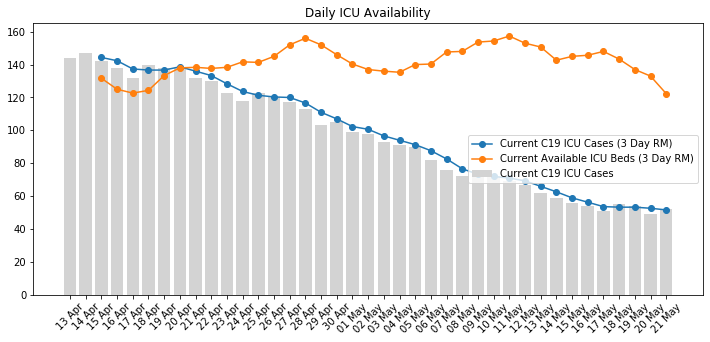

In [124]:
c19plot.daily_icu_availability()

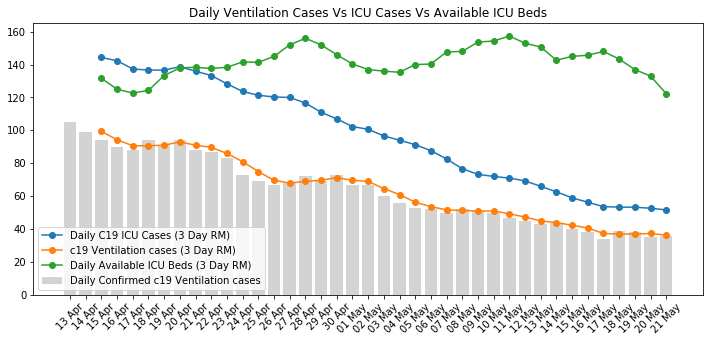

In [125]:
c19plot.daily_icu_vs_ventilation()

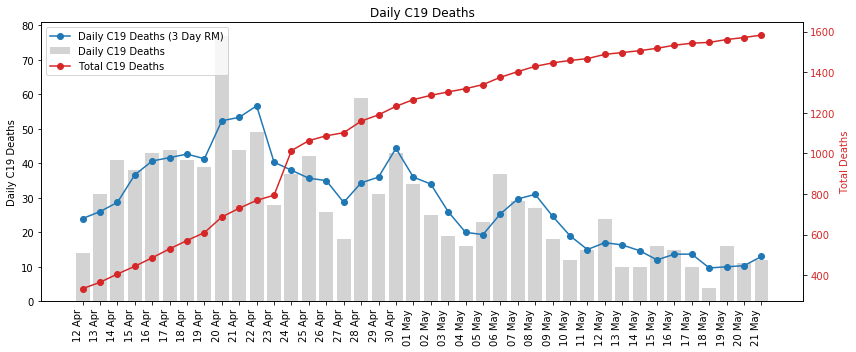

In [126]:
c19plot.hspc_daily_deaths()

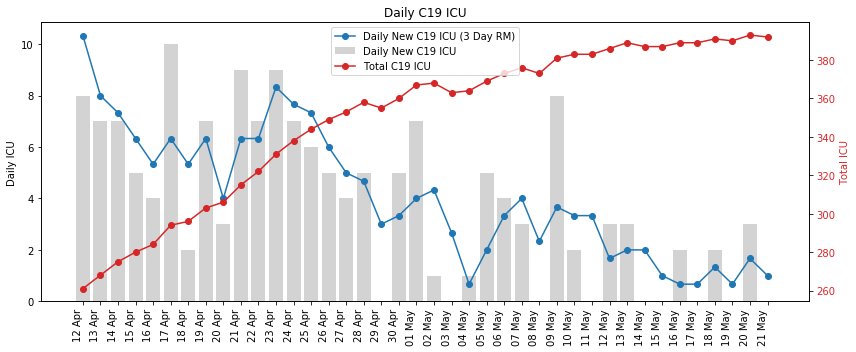

In [127]:
c19plot.hspc_icu()

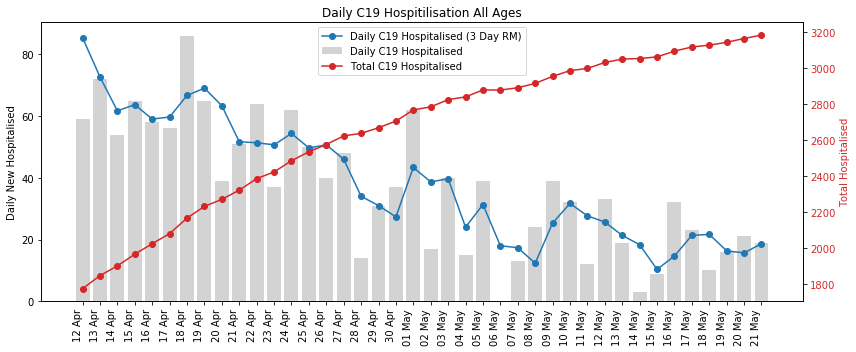

In [128]:
c19plot.hspc_hospitilisation()

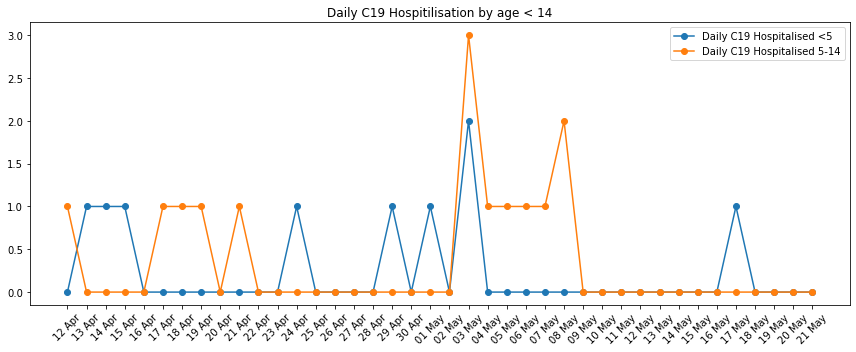

In [129]:
c19plot.hspc_hospitilisation_less_14()

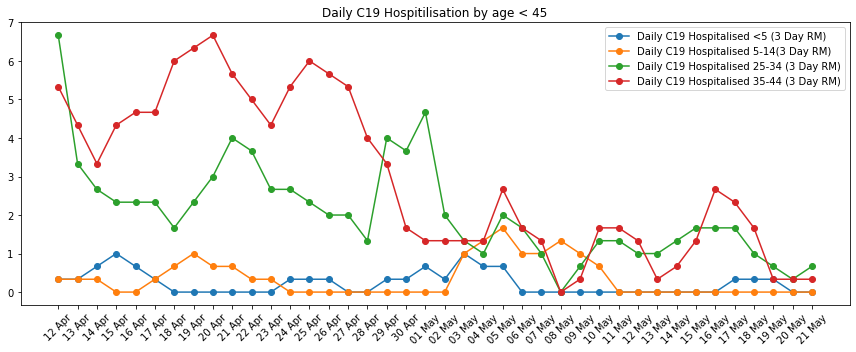

In [130]:
c19plot.hspc_hospitilisation_less_45()

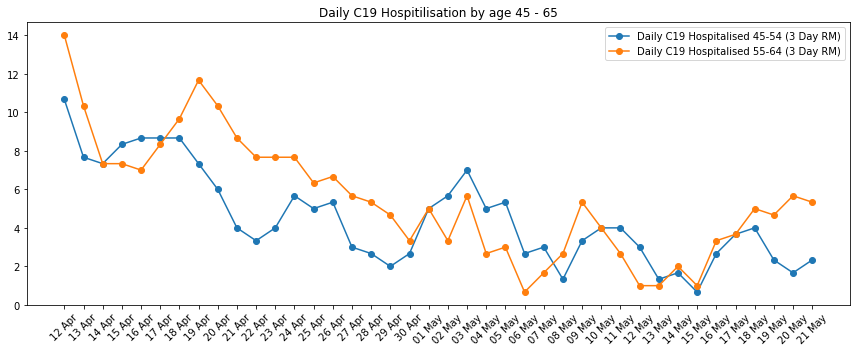

In [131]:
c19plot.hspc_hospitilisation_45_to_65()

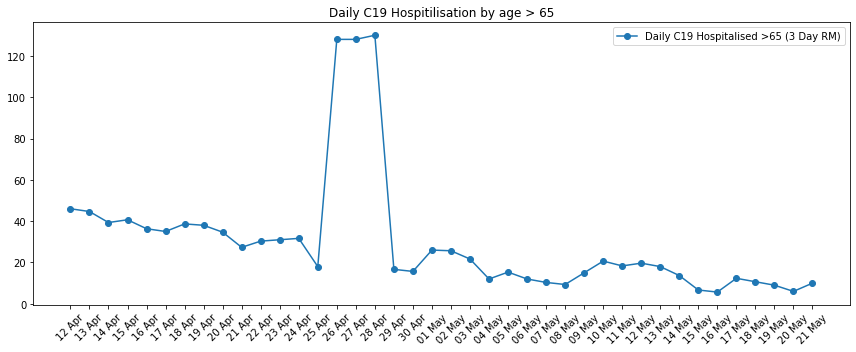

In [132]:
c19plot.hspc_hospitilisation_greater_65()